In [13]:
# Erasmus+ ICCT project (2018-1-SI01-KA203-047081)

# Toggle cell visibility

from IPython.display import HTML
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.input').hide()
    } else {
        $('div.input').show()
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
Toggle cell visibility <a href="javascript:code_toggle()">here</a>.''')
display(tag)

# Hide the code completely

# from IPython.display import HTML
# tag = HTML('''<style>
# div.input {
#     display:none;
# }
# </style>''')
# display(tag)

In [14]:
%matplotlib notebook

import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import sympy as sym

from ipywidgets import widgets, Layout
from ipywidgets import interact

from IPython.display import Latex, display, Markdown # For displaying Markdown and LaTeX code

from matplotlib import patches

Traceback (most recent call last):
  File "C:\Users\Uporabnik\Anaconda3\envs\icct2\lib\site-packages\matplotlib\cbook\__init__.py", line 216, in process
    func(*args, **kwargs)
  File "C:\Users\Uporabnik\Anaconda3\envs\icct2\lib\site-packages\matplotlib\animation.py", line 1465, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


## Sistem za krmiljenje položaja antene

Shematski primer enostavnega sistema za krmiljenje položaja antene je shematsko prikazan na levi sliki spodaj. Cilj sistema za krmiljenje je vzdrževanje referenčnega (zahtevanega) položaja antene, ki ga določimo z nastavitvijo zahtevanega kota antene $\theta_{ref}$ na referenčnem potenciometru (RP). Vstopni signal v blokovni diagram sistema (prikazan na sliki desno spodaj) je tako $\theta_{ref}$, ki se nato pretvori v napetostni signal $U_1$, od katerega se odšteje napetostni signal $U_2$, ki predstavlja izstopni signal za merilnega potenciometra (MP). $U_2$ nosi informacijo o dejanskem položajnem kotu antene. Razlika napetostnih signalov $U_1-U_2$ predstavlja odstopek, ki nam pove, koliko dejanski položajni kot odstopa od zahtevanega. Glede na ta odstopek, sistem za krmiljenje deluje na elektromotor, kateri zavrti anteno na način, da se zmanjša odstopek. $d_w$ predstavlja motnjo zaradi vetra, ki naključno rotira anteno.

<br>
<br>

<table>
    <tr>
        <th>Shematski prikaz sistema za krmiljenje položaja antene</th>
        <th>Blokovni diagram sistema za krmiljenje položaja antene</th>
    </tr>
    <tr>
        <td><img src='img\antenna_azimuth_schematic_slo.png'></td>
        <td><img src='img\block_diagram_antenna_slo.png'></td>
    </tr>
    <tr>
        <td></td>
        <td>Legend: RP-referenčni potenciometer, MP-merilni potenciometer, d<sub>w</sub>-motnja zaradi vetra.</td>
    </tr>    
</table>

---

### Kako upravljati s tem interaktivnim primerom?

- Z uporabo drsnikov spreminjamo vrednosti zahtevanega položaja antene ($\theta_{ref}$), motnje zaradi vetra ($d_w$), ter koeficientov proporcionalnega ($K_p$), integracijskega ($K_i$) in diferencirnega ($K_d$) objekta.

- S preklopnimi gumbi izbiramo med proporcionalnim (P), proporcionalno-integrirnim (PI) in proporcionalno-integrirno-diferencirnim (PID) tipom krmilnika.

---

### Opombe

- Velikost rdeče puščice označene na shematskem prikazu sistema za krmiljenje položaja antene je proporcionalno z magnitudo motnje zaradi vetra ($d_w$), medtem ko smer te puščice kaže smer motnje.
- Črtkana modra črta na shematskem prikazu sistema za krmiljenje položaja antene označuje dejanski položaj antene.
- Črtkana zelena črta na shematskem prikazu sistema za krmiljenje položaja antene označuje zahtevani položaj antene.
- Rdeča črta iz pik in črtic na shematskem prikazu sistema za krmiljenje položaja antene predstavlja predhodni položaj antene.

Izbiraš lahko med dvema načinoma za prikaz rezultatov:
1. Ponastavi shematski prikaz sistema ob spremembi tipa krmilnika.
2. Ponastavi graf položaja antene v odvisnosti od časa ob spremembi tipa krmilnika.


<!-- An example of a simple antenna azimuth position control system is shown schematically in the left figure below. The goal of this control system is to maintain the reference (desired) position of the antenna by setting the desired angle $\theta_{ref}$ with the reference potentiometer (RP). Block diagram of this system (shown in the right figure below) therefore starts with the signal $\theta_{ref}$, which is converted to voltage $U_1$. Voltage $U_2$ is then subtracted from $U_1$. $U_2$ is the output from the measuring potentiometer (MP), which provides the information about the actual angle. Voltage difference $U_1-U_2$ represents the error that tells us how much the actual angle differs from the desired one. Based on this error the controller affects the electromotor, which (by means of gearing) rotates the antenna in the way in which the error is reduced. $d_w$ is a disturbance due to the wind, which randomly rotates the antenna.

<br>
<br>

<table>
    <tr>
        <th>Schematic representation of the antenna azimuth position control system</th>
        <th>Block diagram of the antenna azimuth position control system</th>
    </tr>
    <tr>
        <td><img src='img\antenna_azimuth_schematic.PNG'></td>
        <td><img src='img\antenna_azimuth_block-diagram.PNG'></td>
    </tr>
    <tr>
        <td></td>
        <td>Legend: RP-reference potentiometer, MP-measuring potentiometer, d<sub>w</sub>-disturbance due to the wind.</td>
    </tr>    
</table>

---

### How to use this notebook?

- Move the sliders to change the values of the desired antenna azimuth angle ($\theta_{ref}$), disturbance due to the wind ($d_w$), and proportional ($K_p$), integral ($K_i$) and derivative ($K_d$) tuning coefficients.

- Press the buttons to toggle between proportional (P), proportional-integral (PI) and proportional-integral-derivative (PID) controller type.

---

### Notes

- Size of the red arrow on the schematic representation of the antenna is proportional to the magnitude of the disturbance due to the wind ($d_w$), whereas the direction of the arrow indicates the direction of the disturbance.
- Dashed blue line on the schematic representation of an antenna denotes the actual angle of the atenna.
- Dashed green line on the schematic representation of an antenna denotes the desired angle of the atenna.
- Dash-dot red line on the schematic representation of an antenna indicates the previous actual angle of the antenna.

You can select between two different options for displaying the results:
1. Reset the schematic representation when the controller type is changed.
2. Reset the plot when the controller type is changed. -->

In [15]:
# define system constants
_Kpot = 0.318

_K1 = 100
_a = 100
_Km = 2.083
_am = 1.71
_Kg = 0.1
_R = 8
_Kt = 0.5
_Tv = 200 #in milliseconds

#set current theta and theta reference:
th = [0,0,0,0,0,0]
thref = [0,0,0,0,0,0]
# disturbance:
m = [0,0,0,0,0,0]
#joined together (first theta reference, second disturbance, then theta measured):
variables = [thref, m, th]

# variables of controller:
_K = 1
_taui = 1
_taud = 1


In [16]:
# symbolic calculus:
taui, taud, K, s, z = sym.symbols('taui, taud, K, s, z')

_alpha=0.1
#controller:
P = K
I = K/(taui*s)
D = K*taud*s/(_alpha*taud*s+1)

def make_model(controller):
    if controller == 'P':
        C = P
    elif controller == 'PI':
        C = P+I
    elif controller == 'PID':
        C = P+I+D
    else:
        print('Controller type not in library')
    
    tf_s = C*_K1*_Km*_Kg*_Kpot/(s*(s+_a)*(s+_am)+C*_K1*_Km*_Kg*_Kpot)
    tf_s = tf_s.simplify()

    tf_z = tf_s.subs(s,2/(_Tv/1000)*(z-1)/(z+1))
    tf_z = tf_z.simplify()
    
    num = [sym.fraction(tf_z.factor())[0].expand().coeff(z, i) for i in reversed(range(1+sym.degree(sym.fraction(tf_z.factor())[0], gen=z)))]
    den = [sym.fraction(tf_z.factor())[1].expand().coeff(z, i) for i in reversed(range(1+sym.degree(sym.fraction(tf_z.factor())[1], gen=z)))]
    #print(num)
    #print(den)

    tf_sM = _Km*_Kg*_R*(s+_a)/(s*(s+_a)*(s+_am)*_Kt+C*_K1*_Km*_Kg*_Kpot*_Kt)
    
    tf_zM = tf_sM.subs(s,2/(_Tv/1000)*(z-1)/(z+1))
    tf_zM = tf_zM.simplify()
    num_M = [sym.fraction(tf_zM.factor())[0].expand().coeff(z, i) for i in reversed(range(1+sym.degree(sym.fraction(tf_zM.factor())[0], gen=z)))]
    #print(num_M)
    #print(den_M)
    
    #print('\n........finished........')
    return sym.lambdify((K, taui, taud), [np.array(num), -np.array(num_M), -np.array(den)])

z_transform_p = make_model('P')
z_transform_pi = make_model('PI')
z_transform_pid = make_model('PID')

In [17]:
def calculate_next(z_transform):
    variables[-1][0] = 0 # set current to zero
    z_transform = z_transform(_K, _taui, _taud)
    
    temp = 0
    for i in range(len(z_transform)): # for every polynomial
        for j in range(len(z_transform[i])): # for every term in polynomial
            temp += z_transform[i][j] * variables[i][j]

    return temp / z_transform[-1][0]*(-1)

<IPython.core.display.Javascript object>


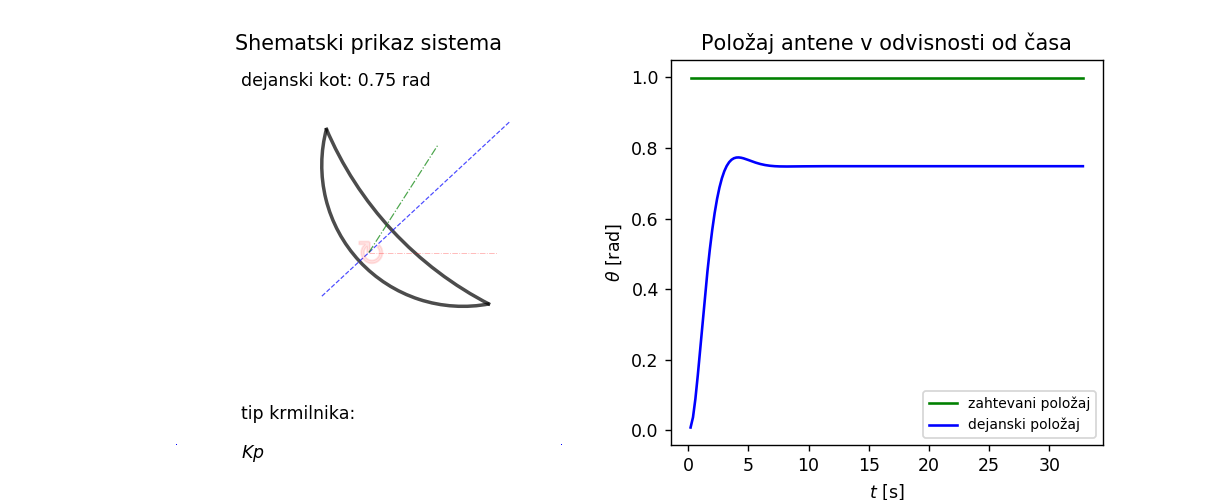

ToggleButtons(description='Izberi tip krmilnika:', options=('P', 'PI', 'PID'), style=ToggleButtonsStyle(descri…

In [18]:
fig = plt.figure(figsize=(9.8, 4),num='Antenna azimuth position control system')
# add axes
ax = fig.add_subplot(121)
graph = fig.add_subplot(122)
    
#set current theta and theta reference:
th = [0,0,0,0,0,0]
thref = [1,0,0,0,0,0]
# disturbance:
m = [.1,0,0,0,0,0]
#joined together (first theta reference, second disturbance, then theta measured):
variables = [thref, m, th]

# variables of controller:
_K = 20
_taui = 10
_taud = 1

new_flag_value = [True, 0] # flag for displaying old value of th, before th_ref was changed [flag, angle]

#slider widgets:
th_ref_widget = widgets.FloatSlider(value=variables[0][0],min=0.0,max=2*np.pi,step=.01,description=r'\(\theta_{ref} \) [rad]',
                    disabled=False,continuous_update=True,orientation='horizontal',readout=True,readout_format='.2f')
m_widget = widgets.FloatSlider(value=variables[1][0],min=-.3,max=.3,step=.01,description=r'\(d_{w} \)',
                    disabled=False,continuous_update=True,orientation='horizontal',readout=True,readout_format='.2f')
K_widget = widgets.FloatSlider(value=_K,min=0.0,max=40,step=.1,description=r'\(K_p \)',
                    disabled=False,continuous_update=True,orientation='horizontal',readout=True,readout_format='.1f')
taui_widget = widgets.FloatSlider(value=_taui,min=0.01,max=60,step=.01,description=r'\(K_i \)',
                    disabled=False,continuous_update=True,orientation='horizontal',readout=True,readout_format='.2f')
taud_widget = widgets.FloatSlider(value=_taud,min=0.0,max=5,step=.1,description=r'\(K_d \)',
                    disabled=False,continuous_update=True,orientation='horizontal',readout=True,readout_format='.2f')
#interact(set_coefficients, setK=K_widget, setthref=th_ref_widget, setm=m_widget, settaui=taui_widget, settaud=taud_widget)

#checkboxes
#checkbox_reset_antenna = widgets.Checkbox(value=False, description='Reset schematic representation of antenna when type of controller is changed', disabled=False)
#checkbox_reset_graph = widgets.Checkbox(value=False, description='Reset graph when type of controller is changed', disabled=False)

checkbox_reset_antenna = widgets.Checkbox(value=False, disabled=False, layout=Layout(width='100px'))
label_scheme = widgets.Label('Ponastavi shematski prikaz sistema ob spremembi tipa krmilnika', layout=Layout(width='500px'))
box1 = widgets.HBox([checkbox_reset_antenna, label_scheme])
                             
checkbox_reset_graph = widgets.Checkbox(value=False, disabled=False, layout=Layout(width='100px'))
label_graph = widgets.Label('Ponastavi graf položaja antene v odvisnosti od časa ob spremembi tipa krmilnika', layout=Layout(width='500px'))
box2 = widgets.HBox([checkbox_reset_graph, label_graph])

style = {'description_width': 'initial'}

#buttons:
def buttons_clicked(event):
    global controller_type, equation, list_th, list_th_ref, list_time
    controller_type = buttons.options[buttons.index]
    if controller_type =='P':
        taui_widget.disabled=True
        taud_widget.disabled=True
        equation = '$Kp$'
    if controller_type =='PI':
        taui_widget.disabled=False
        taud_widget.disabled=True
        equation = '$Kp\,(1+\dfrac{1}{T_{i}\,s})$'
    if controller_type =='PID':
        taui_widget.disabled=False
        taud_widget.disabled=False
        equation = '$Kp\,(1+\dfrac{1}{T_{i}\,s}+\dfrac{T_{d}\,s}{a\,T_{d}\,s+1})$'
    if checkbox_reset_antenna.value:
        #reset values to zero:
        for i in range(len(variables)):
            for j in range(1, len(variables[i])):
                variables[i][j] = 0
        variables[-1][0] = 0
    if checkbox_reset_graph.value:
        list_th = []
        list_th_ref = []
        list_time = []
        
buttons = widgets.ToggleButtons(
    options=['P', 'PI', 'PID'],
    description='Izberi tip krmilnika:',
    disabled=False,
    style=style)
buttons.observe(buttons_clicked)


#updating values
def set_values(event):
    global _K, _taui, _taud
    if event['name'] != 'value':
        return
    if th_ref_widget.value != variables[0][0] and not new_flag_value[0]:
        new_flag_value[0] = True
        new_flag_value[1] = variables[-1][0]
        
    variables[0][0] = th_ref_widget.value
    variables[1][0] = m_widget.value
    _K = K_widget.value
    _taui = taui_widget.value
    _taud = taud_widget.value
th_ref_widget.observe(set_values)
m_widget.observe(set_values)
K_widget.observe(set_values)
taui_widget.observe(set_values)
taud_widget.observe(set_values)

#displaying widgets:
display(buttons)
vbox1 = widgets.VBox([th_ref_widget, m_widget, K_widget, taui_widget, taud_widget])
vbox2 = widgets.VBox([box1, box2])
hbox = widgets.HBox([vbox1, vbox2])
display(hbox)

#setting at start:
controller_type = 'P'
taui_widget.disabled=True
taud_widget.disabled=True
equation = '$Kp$'
set_values({'name':'value'})

#lists for graph in time:
list_time = []
list_th = []
list_th_ref = []

#previous th before change of th_ref:
prev_th = 0

cycles_flag = True

def update_figure(i_time):
    global cycles_flag, variables, _K, controller_type, equation
    
    if cycles_flag == True:
        cycles_flag = False
        return
    
    if controller_type == 'P':
        th = calculate_next(z_transform_p)
    elif controller_type == 'PI':
        th = calculate_next(z_transform_pi)
    elif controller_type == 'PID':
        th = calculate_next(z_transform_pid)
    variables[-1][0] = th
    
    # save variables for next time step:
    for i in range(len(variables)):
        for j in reversed(range(len(variables[i])-1)):
            variables[i][j+1] = variables[i][j]

    list_time.append((i_time+1)*_Tv/1000)
    list_th.append(th)
    list_th_ref.append(variables[0][0])
    
    #plot:
    ax.clear()
    ax.plot([-1.5, 1.5, 1.5, -1.5], [-1.5, -1.5, 1.5, 1.5], ',', color='b')
    
    #plot line:
    ax.plot([np.cos(th)*-.5, np.cos(th)*1.5], [np.sin(th)*-.5, np.sin(th)*1.5], 'b--', linewidth=.7, alpha=.7)
    
    #plot antenna:
    center1 = 1
    center2 = 3
    d1 = 2.2
    d2 = 5.5
    x1 = center1*np.cos(th)
    y1 = center1*np.sin(th)
    x2 = center2*np.cos(th)
    y2 = center2*np.sin(th)
    arc1 = patches.Arc((x1, y1), d1, d1,
                 angle=th/np.pi*180+180, theta1=-58, theta2=58, linewidth=2, color='black', alpha=.7)
    arc2 = patches.Arc((x2, y2), d2, d2,
                 angle=th/np.pi*180+180, theta1=-20, theta2=20, linewidth=2, color='black', alpha=.7)
    ax.add_patch(arc1)
    ax.add_patch(arc2)
    if m_widget.value > 0:
        ax.plot(0, 0, 'r', alpha=.1, marker=r'$\circlearrowright$',ms=150*m_widget.value)
    elif m_widget.value < 0:
        ax.plot(0, 0, 'r', alpha=.1, marker=r'$\circlearrowleft$',ms=-150*m_widget.value)
    ax.set_title('Shematski prikaz sistema')

    
    #plot direction of antenna before thref change
    if abs(variables[0][0] - th) < 0.03:
        new_flag_value[0] = False
    if new_flag_value[0]:
        ax.plot([0,np.cos(new_flag_value[1])], [0, np.sin(new_flag_value[1])], 'r-.', alpha=.3, linewidth=0.5)
    #plot desired direction of antenna
    ax.plot([0,np.cos(variables[0][0])], [0, np.sin(variables[0][0])], 'g-.', alpha=.7, linewidth=0.7)
    
    ax.text(-1, 1.3, 'dejanski kot: %.2f rad' %th)
    ax.text(-1, -1.3, 'tip krmilnika:')
    ax.text(-1, -1.6, equation)
    
    ax.set_aspect('equal', adjustable='datalim')
    ax.set_xlim(-1.5,1.5)
    ax.set_ylim(-1.5,1.5)
    ax.axis('off')
    
    graph.clear()
    graph.plot(list_time, list_th_ref, 'g', label='zahtevani položaj')
    graph.plot(list_time, list_th, 'b', label='dejanski položaj')    
    graph.set_xlabel('$t$ [s]')
    graph.set_ylabel('$\\theta$ [rad]')
    graph.legend(loc=4, fontsize=8)
    graph.set_title('Položaj antene v odvisnosti od časa')
    
    plt.show()

ani = animation.FuncAnimation(fig, update_figure, interval=_Tv)